In [2]:
import numpy as np
import matplotlib.pyplot as plt


LHC Parameter Estimation: Masses, Couplings, and Decay Rates

In this notebook, we will use the Fisher matrix to estimate the precision with which the LHC can measure particle masses, couplings, and decay rates. We assume a simplified model for a particle decay and calculate how uncertainties in experimental measurements propagate to the parameters of interest.

## Equations and Physics
 
### 1. Cross-section for a Particle Production
 
The **cross-section** $ \sigma $ for a particle production process at the LHC is related to the particle mass $ m $, coupling constant $ g $, and other model parameters: 
$$
\sigma(m, g) = \frac{g^2}{s} \frac{1}{(m^2 - s)^2 + m^2 \Gamma^2}
$$
 
where:
- $ g $ is the coupling constant.
- $ s $ is the square of the center-of-mass energy.
- $ m $ is the particle mass.
- $ \Gamma $ is the decay width (related to the decay rate).

### 2. Decay Width
The decay width $ \Gamma $ is related to the decay rate of the particle and determines its lifetime. It is also proportional to the coupling constant squared:
$$
\Gamma = g^2 \frac{m}{8 \pi}
$$ 

### 3. Fisher Matrix for Collider Data

The Fisher matrix for the parameters $ \theta = (m, g, \Gamma) $ is given by:
 
$$
F_{\alpha \beta} = \sum_i \frac{1}{\sigma_i^2} \frac{\partial \sigma_i}{\partial \theta_\alpha} \frac{\partial \sigma_i}{\partial \theta_\beta}
$$
where:
- $ \sigma_i $ is the experimental cross-section at point $ i $ with uncertainty $ \sigma_i $.
- $ \theta_\alpha $ and $ \theta_\beta $ are the parameters (mass $ m $, coupling $ g $, or decay width $ \Gamma $).


### Simulating Cross-Section Data

We first simulate the cross-section measurements for a particle as a function of its mass, assuming different levels of experimental uncertainty (e.g., 5%, 2%, and 1%). We will plot these simulated data points to visualize how the uncertainty affects the measurements.

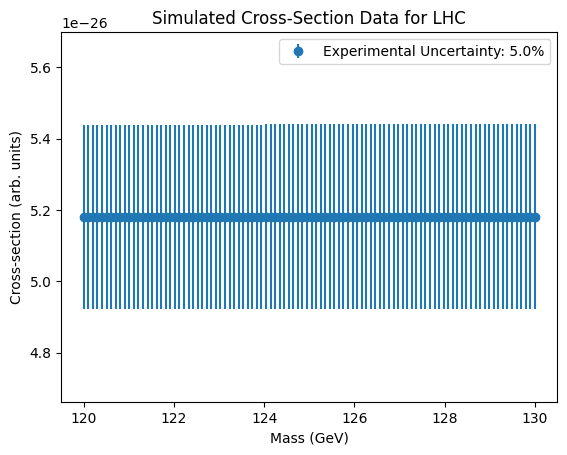

In [35]:

# Define the experimental parameters
s = 13000**2  # Center-of-mass energy squared (GeV^2)
g_true = 0.5  # True value of the coupling constant
m_true = 125.0  # True value of the particle mass (GeV)
Gamma_true = g_true**2 * m_true / (8 * np.pi)  # Decay width (GeV)

# Define a function for the cross-section
def cross_section(s, m, g, Gamma):
    return (g**2 / s) * (1 / ((m**2 - s)**2 + m**2 * Gamma**2))

# Simulate experimental measurements of the cross-section
n_points = 100  # Number of data points
m_range = np.linspace(120, 130, n_points)  # Mass range around the true value

# Function to simulate cross-sections with a given experimental uncertainty
def simulate_data(exp_uncertainty):
    cross_sections = cross_section(s, m_range, g_true, Gamma_true)  # True cross-sections
    uncertainties = exp_uncertainty * cross_sections  # Experimental uncertainty (relative)
    
    # Plot the true cross-sections with uncertainties
    plt.errorbar(m_range, cross_sections, yerr=uncertainties, fmt='o', label=f'Experimental Uncertainty: {exp_uncertainty*100:.1f}%')
    plt.xlabel('Mass (GeV)')
    plt.ylabel('Cross-section (arb. units)')
    plt.title('Simulated Cross-Section Data for LHC')
    plt.legend()
    plt.ylim(-2*uncertainties[0]+cross_sections[0], cross_sections[0]+2*uncertainties[0])
    plt.show()

    return cross_sections, uncertainties




# Simulate with Poissonian uncertainty 
cross_sections, uncertainties = simulate_data(0.05)


### This case shows the case for uncertainty depending as Poissonian, assuming that the number of events decreases with the mass

Run if wanted

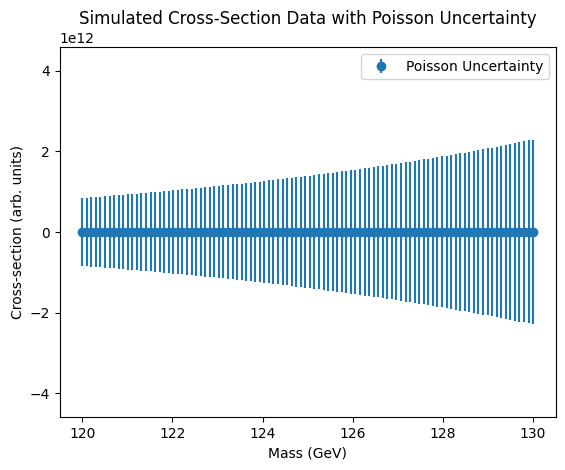

In [26]:

# Define a function to simulate data with event-counting (Poisson) uncertainty
def simulate_data_poisson(noise_factor=10):
    # Simulate an exponentially decreasing number of events with increasing mass
    cross_sections = cross_section(s, m_range, g_true, Gamma_true)  # True cross-sections
    N_events = noise_factor * np.exp(-(m_range - m_true) / 5.0) * cross_sections  # Exponential decrease in number of events with mass
    
    # Poisson uncertainty is proportional to 1/sqrt(N), where N is the number of events
    uncertainties = 1 / np.sqrt(N_events)  
       
    # Plot the true cross-sections with uncertainties
    plt.errorbar(m_range, cross_sections, yerr=uncertainties, fmt='o', label=f'Poisson Uncertainty')
    plt.xlabel('Mass (GeV)')
    plt.ylabel('Cross-section (arb. units)')
    plt.title('Simulated Cross-Section Data with Poisson Uncertainty')
    plt.legend()
    plt.ylim(-2*uncertainties[-1]+cross_sections[-1], cross_sections[-1]+2*uncertainties[-1])

    plt.show()

    return cross_sections, uncertainties



# Simulate with Poissonian uncertainty 
cross_sections, uncertainties = simulate_data_poisson()

In [36]:

# ## Fisher Matrix Calculation with Adjustable Experimental Uncertainty

# Define partial derivatives of the cross-section
def partial_m(s, m, g, Gamma):
    return -(g**2 * 4 * m * (s - m**2)) / ((s - m**2)**2 + m**2 * Gamma**2)**2

def partial_g(s, m, g, Gamma):
    return (2 * g / s) * (1 / ((m**2 - s)**2 + m**2 * Gamma**2))

def partial_Gamma(s, m, g, Gamma):
    return -(2 * g**2 * m * Gamma) / ((m**2 - s)**2 + m**2 * Gamma**2)**2



Experimental Uncertainty: 5.0%


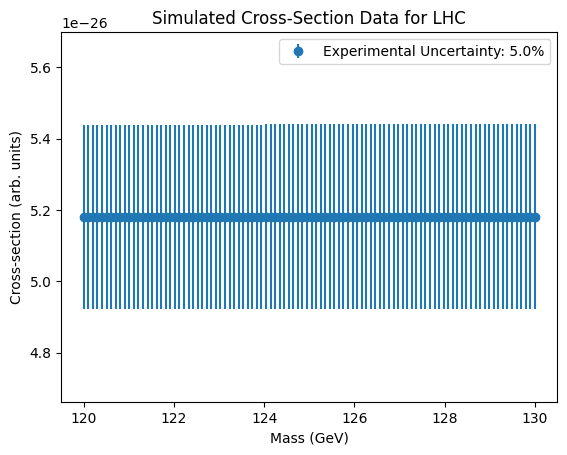

Uncertainty on the particle mass (sigma_m): 74.7095 GeV
Uncertainty on the coupling constant (sigma_g): 1.7268
Uncertainty on the decay width (sigma_Gamma): 20303088639.4918 GeV

Experimental Uncertainty: 2.0%


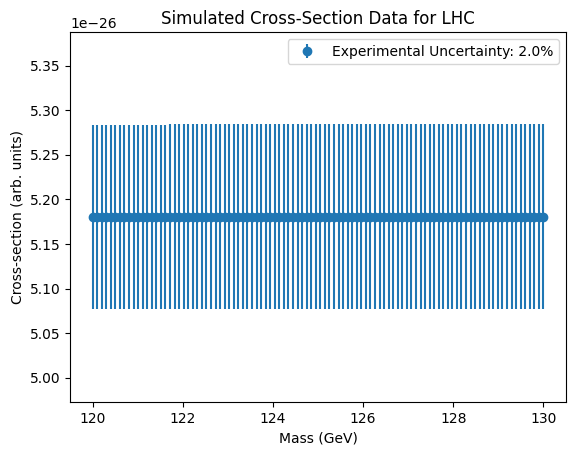

Uncertainty on the particle mass (sigma_m): 28.9330 GeV
Uncertainty on the coupling constant (sigma_g): 0.6688
Uncertainty on the decay width (sigma_Gamma): 7862845422.2781 GeV

Experimental Uncertainty: 1.0%


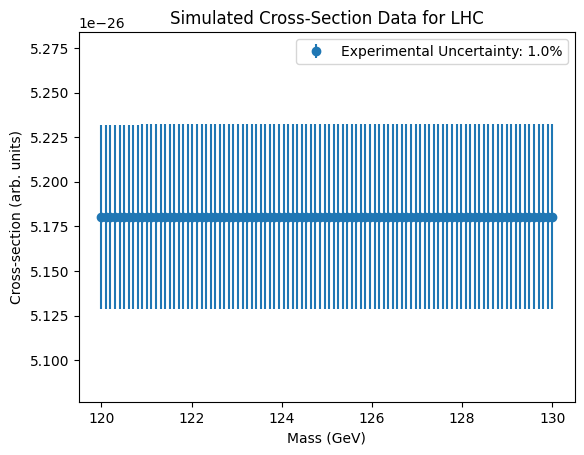

Uncertainty on the particle mass (sigma_m): 14.4665 GeV
Uncertainty on the coupling constant (sigma_g): 0.3344
Uncertainty on the decay width (sigma_Gamma): 3931422711.1391 GeV


In [38]:

# Fisher matrix function with experimental uncertainty
def fisher_matrix(uncertainties):
    F = np.zeros((3, 3))
    
    # Calculate the Fisher matrix
    for i in range(n_points):
        sigma_i = uncertainties[i]
        F[0, 0] += (partial_m(s, m_range[i], g_true, Gamma_true) / sigma_i)**2  # Derivative w.r.t. mass
        F[1, 1] += (partial_g(s, m_range[i], g_true, Gamma_true) / sigma_i)**2  # Derivative w.r.t. coupling
        F[2, 2] += (partial_Gamma(s, m_range[i], g_true, Gamma_true) / sigma_i)**2  # Derivative w.r.t. decay width
        F[0, 1] += (partial_m(s, m_range[i], g_true, Gamma_true) * partial_g(s, m_range[i], g_true, Gamma_true)) / sigma_i**2  # Cross-term
        F[0, 2] += (partial_m(s, m_range[i], g_true, Gamma_true) * partial_Gamma(s, m_range[i], g_true, Gamma_true)) / sigma_i**2
        F[1, 2] += (partial_g(s, m_range[i], g_true, Gamma_true) * partial_Gamma(s, m_range[i], g_true, Gamma_true)) / sigma_i**2

    F[1, 0] = F[0, 1]
    F[2, 0] = F[0, 2]
    F[2, 1] = F[1, 2]

    return F

# ## Function to calculate uncertainties on parameters
def calculate_uncertainties(F):
    # Invert the Fisher matrix
    covariance_matrix = np.linalg.inv(F)

    # The diagonal elements of the covariance matrix provide the variances
    sigma_m = np.sqrt(covariance_matrix[0, 0])
    sigma_g = np.sqrt(covariance_matrix[1, 1])
    sigma_Gamma = np.sqrt(covariance_matrix[2, 2])

    return sigma_m, sigma_g, sigma_Gamma

# Simulate with different levels of experimental uncertainty
exp_uncertainties = [0.05, 0.02, 0.01]  # 5%, 2%, 1% uncertainties

for exp_uncertainty in exp_uncertainties:
    print(f"\nExperimental Uncertainty: {exp_uncertainty * 100:.1f}%")
    
    # Simulate data
    cross_sections, uncertainties = simulate_data(exp_uncertainty)
    
    # Calculate Fisher matrix
    F = fisher_matrix(uncertainties)
    
    # Calculate parameter uncertainties
    sigma_m, sigma_g, sigma_Gamma = calculate_uncertainties(F)
    
    # Print the results
    print(f"Uncertainty on the particle mass (sigma_m): {sigma_m:.4f} GeV")
    print(f"Uncertainty on the coupling constant (sigma_g): {sigma_g:.4f}")
    print(f"Uncertainty on the decay width (sigma_Gamma): {sigma_Gamma:.4f} GeV")
